In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
sns.set(style="white")

In [61]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [66]:
df = pd.read_excel('round4.xlsx')
df_complete = df[df['Completed'] > 0]
#df_complete = df[df['School_Decision'] == "Admit"]

In [73]:
df_complete['Race'].fillna("nan", inplace=True)
df_complete['Sex'].fillna("nan", inplace=True)
df_complete['Native Language'].fillna("nan", inplace=True)
df_complete['School_Decision'] = df_complete['School_Decision'].replace('Administrative Withdrawal', 'Withdraw')
df_complete['Citizenship'].fillna("nan", inplace=True)
df_complete['Have you ever failed a course?'].fillna("nan", inplace=True)
df_complete['GRE Verified'].fillna("No", inplace=True)
df_complete['School_Decision']=df_complete['School_Decision'].replace("Waitlist", 0)
df_complete['School_Decision']=df_complete['School_Decision'].replace("Withdraw", 0)
df_complete['School_Decision']=df_complete['School_Decision'].replace("Admit", 1)
df_complete['School_Decision']=df_complete['School_Decision'].replace("Deny", 0)
df_complete['Overall_GPA'].fillna(0, inplace=True)
df_complete['student_Decision'].fillna("nan",inplace=True)
df_complete['Tuition Percentage'].fillna("nan",inplace=True)
df_complete['Tuition Percentage']=df_complete['Tuition Percentage'].replace("nan",0)
df_complete['Native Language']=LabelEncoder().fit_transform(df_complete['Native Language'])
df_complete['Citizenship']=LabelEncoder().fit_transform(df_complete['Citizenship'])
df_complete['GRE Verified']=LabelEncoder().fit_transform(df_complete['GRE Verified'])
#df_complete['School_Decision']=LabelEncoder().fit_transform(df_complete['School_Decision'])
df_complete['Sex']=LabelEncoder().fit_transform(df_complete['Sex'])

## Logistic Regression

In [74]:
def GRE_cleaned(df_raw):
    df_gre = df_raw.copy()
    df_result = df_gre.copy()
    df_result['GRE Take or Not'] = np.where(df_result['GRE Verbal'].isna(), 0, 1)
    return df_result

In [75]:
df2=df_complete.copy()
df2=df2.drop(['Completed'], axis=1)
df2.head(100)

,Unnamed: 0,Ref,Sex,Citizenship,Native Language,Race,Have you ever failed a course?,Sub-Category,Birth Country,Tuition Percentage,year,School_Decision,student_Decision,final_Decision,Been_On_Waitinglist,Overall_GPA,GRE Verbal,GRE Verbal Percentile,GRE Quantitative,GRE Quantitative Percentile,GRE Analytical Writing,GRE Analytical Writing Percentile,GRE Verified,avg_score_round,Number_Recommender,Graduation_Year,Graduation_Country,Year_after_graduation,Just_after_graduation,job1_duration,job2_duration,job3_duration,max_job_duration,full-time_job_experience
0,0,511330193,1,0,24,Asian,0,Computational Methods,IN,0.0,2021,0,nan,NaN,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,4,3,2020.0,India,1.0,1.0,NaN,NaN,NaN,NaN,0
1,1,723116564,0,0,14,Asian,0,Computational Methods,IN,40.0,2021,1,Accept Offer,Accept Offer,0,3.560000,157.0,75.0,168.0,92.0,3.5,38.0,1,5,3,2017.0,India,4.0,0.0,NaN,NaN,NaN,NaN,0
2,2,533806749,0,0,14,Asian,0,Statistical Methodology,IN,0.0,2021,0,nan,NaN,0,2.920000,146.0,28.0,163.0,80.0,3.0,14.0,1,4,3,2021.0,India,0.0,1.0,61.0,121.0,92.0,4.0,0
3,3,253306511,0,0,14,Asian,0,Statistical Methodology,IN,0.0,2021,0,nan,NaN,0,3.288000,NaN,NaN,NaN,NaN,NaN,NaN,0,5,3,2014.0,India,7.0,0.0,NaN,1612.0,NaN,54.0,1
4,7,60206854,1,0,51,nan,0,Health and Biomedical Sciences,IN,0.0,2017,0,nan,NaN,0,3.096000,NaN,NaN,NaN,NaN,NaN,NaN,0,3,3,2015.0,India,2.0,0.0,NaN,NaN,NaN,NaN,0
5,8,120240620,1,1,9,White,0,Statistical Methodology,IR,0.0,2017,0,nan,NaN,0,3.360000,NaN,NaN,NaN,NaN,NaN,NaN,0,5,3,2018.0,US,-1.0,1.0,486.0,NaN,NaN,16.0,0
6,9,868223637,1,0,51,nan,1,Statistical Methodology,PK,0.0,2020,0,nan,NaN,0,3.510000,NaN,NaN,NaN,NaN,NaN,NaN,0,4,3,2020.0,Pakistan,0.0,1.0,NaN,92.0,NaN,3.0,0
7,10,57943445,1,0,34,nan,0,Statistical Methodology,BE,40.0,2020,1,Defer,Defer,0,2.920000,163.0,93.0,166.0,89.0,4.5,81.0,1,5,3,2019.0,Belgium,1.0,1.0,396.0,943.0,NaN,31.0,0
8,11,57943445,1,0,34,nan,0,Statistical Methodology,BE,40.0,2021,1,Decline Offer,Decline Offer,0,2.920000,163.0,93.0,166.0,89.0,4.5,81.0,1,0,0,2019.0,Belgium,2.0,0.0,396.0,943.0,NaN,31.0,1
9,14,792101457,1,0,46,nan,0,Business and Social Science,IN,0.0,2016,0,nan,NaN,0,2.996000,145.0,25.0,170.0,98.0,3.5,38.0,1,4,3,2014.0,India,2.0,0.0,NaN,335.0,NaN,11.0,1


In [76]:
df_submitted = df2.copy()
df_gre = GRE_cleaned(df_submitted)

In [77]:
df_test = df_gre[df_gre['GRE Take or Not'] == 1]
df_test["GRE_Total"]= df_test["GRE Quantitative"]+ df_test["GRE Verbal"]
df_test= df_test[df_test["GRE_Total"] < 341]
df_test= df_test[df_test["GRE_Total"] > 260]

In [112]:
x= df_test["GRE_Total"]
y = df_test['School_Decision']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=1234)
x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [113]:
classifier = LogisticRegression(random_state = 0,class_weight = 'balanced')
classifier.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [114]:
y_pred = classifier.predict(x_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.654292343387471


In [115]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

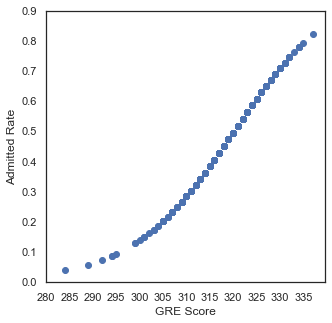

In [121]:
y_predict=classifier.predict_proba(x_test)[:,1]
f = plt.figure(figsize=(5,5))
plt.scatter(x_test,y_predict)
#plt.xlim(280, 340)
#plt.ylim(0, 1)
plt.xticks(np.arange(280, 340, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel("GRE Score")
plt.ylabel("Admitted Rate")
f.savefig("GRE.pdf", bbox_inches='tight')

In [94]:
df3=df_complete.copy()
df3=df3[df3['Overall_GPA'] > 0]
df3.head(100)

,Unnamed: 0,Ref,Sex,Citizenship,Native Language,Race,Have you ever failed a course?,Sub-Category,Birth Country,Tuition Percentage,year,Completed,School_Decision,student_Decision,final_Decision,Been_On_Waitinglist,Overall_GPA,GRE Verbal,GRE Verbal Percentile,GRE Quantitative,GRE Quantitative Percentile,GRE Analytical Writing,GRE Analytical Writing Percentile,GRE Verified,avg_score_round,Number_Recommender,Graduation_Year,Graduation_Country,Year_after_graduation,Just_after_graduation,job1_duration,job2_duration,job3_duration,max_job_duration,full-time_job_experience
1,1,723116564,0,0,14,Asian,0,Computational Methods,IN,40.0,2021,1,1,Accept Offer,Accept Offer,0,3.560000,157.0,75.0,168.0,92.0,3.5,38.0,1,5,3,2017.0,India,4.0,0.0,NaN,NaN,NaN,NaN,0
2,2,533806749,0,0,14,Asian,0,Statistical Methodology,IN,0.0,2021,1,0,nan,NaN,0,2.920000,146.0,28.0,163.0,80.0,3.0,14.0,1,4,3,2021.0,India,0.0,1.0,61.0,121.0,92.0,4.0,0
3,3,253306511,0,0,14,Asian,0,Statistical Methodology,IN,0.0,2021,1,0,nan,NaN,0,3.288000,NaN,NaN,NaN,NaN,NaN,NaN,0,5,3,2014.0,India,7.0,0.0,NaN,1612.0,NaN,54.0,1
4,7,60206854,1,0,51,nan,0,Health and Biomedical Sciences,IN,0.0,2017,1,0,nan,NaN,0,3.096000,NaN,NaN,NaN,NaN,NaN,NaN,0,3,3,2015.0,India,2.0,0.0,NaN,NaN,NaN,NaN,0
5,8,120240620,1,1,9,White,0,Statistical Methodology,IR,0.0,2017,1,0,nan,NaN,0,3.360000,NaN,NaN,NaN,NaN,NaN,NaN,0,5,3,2018.0,US,-1.0,1.0,486.0,NaN,NaN,16.0,0
6,9,868223637,1,0,51,nan,1,Statistical Methodology,PK,0.0,2020,1,0,nan,NaN,0,3.510000,NaN,NaN,NaN,NaN,NaN,NaN,0,4,3,2020.0,Pakistan,0.0,1.0,NaN,92.0,NaN,3.0,0
7,10,57943445,1,0,34,nan,0,Statistical Methodology,BE,40.0,2020,1,1,Defer,Defer,0,2.920000,163.0,93.0,166.0,89.0,4.5,81.0,1,5,3,2019.0,Belgium,1.0,1.0,396.0,943.0,NaN,31.0,0
8,11,57943445,1,0,34,nan,0,Statistical Methodology,BE,40.0,2021,1,1,Decline Offer,Decline Offer,0,2.920000,163.0,93.0,166.0,89.0,4.5,81.0,1,0,0,2019.0,Belgium,2.0,0.0,396.0,943.0,NaN,31.0,1
9,14,792101457,1,0,46,nan,0,Business and Social Science,IN,0.0,2016,1,0,nan,NaN,0,2.996000,145.0,25.0,170.0,98.0,3.5,38.0,1,4,3,2014.0,India,2.0,0.0,NaN,335.0,NaN,11.0,1
10,17,373984831,0,0,14,nan,0,Business and Social Science,IN,0.0,2017,1,0,nan,NaN,0,3.176000,157.0,75.0,167.0,93.0,3.0,17.0,1,4,3,2015.0,India,2.0,0.0,NaN,NaN,NaN,NaN,0


In [96]:
x= df3["Overall_GPA"]
y = df3['School_Decision']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=1234)
x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [97]:
classifier = LogisticRegression(random_state = 0,class_weight = 'balanced')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7193675889328063


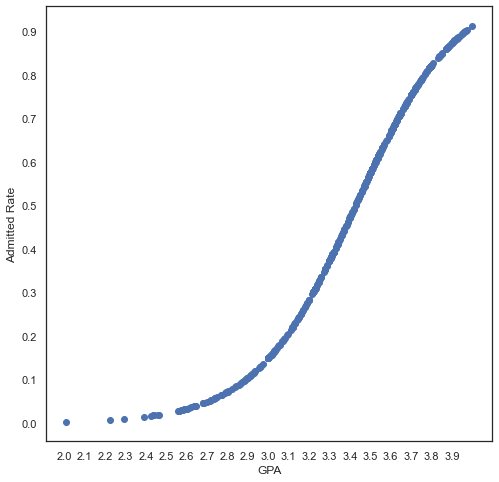

In [111]:
y_predict=classifier.predict_proba(x_test)[:,1]
f = plt.figure(figsize=(8,8))
plt.scatter(x_test,y_predict)
#plt.xlim(280, 340)
#plt.ylim(0, 1)
plt.xticks(np.arange(2, 4, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel("GPA")
plt.ylabel("Admitted Rate")
f.savefig("GPA.pdf", bbox_inches='tight')